In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#load the data

df=pd.read_csv(r"C:\Users\Prerana\Downloads\Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


EDA

In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df['Sales'].nunique()

336

In [7]:
df['Sales'] = pd.cut(x=df['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
df['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [8]:
df['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [9]:
df.corr()

,CompPrice,Income,Advertising,Population,Price,Age,Education
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [10]:
#Tranforming the sales column
le=LabelEncoder()
df['Sales']=le.fit_transform(df['Sales'])

In [11]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,111,48,16,260,83,Good,65,10,Yes,Yes
2,2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,2,117,100,4,466,97,Medium,55,14,Yes,Yes
4,1,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,Good,33,14,Yes,Yes
396,2,139,23,3,37,120,Medium,55,11,No,Yes
397,2,162,26,12,368,159,Medium,40,18,Yes,Yes
398,1,100,79,7,284,95,Bad,50,12,Yes,Yes


In [12]:
#Transforming the remaining columns
oe=OrdinalEncoder()
df['ShelveLoc']=oe.fit_transform(df[['ShelveLoc']])
df['Urban']=oe.fit_transform(df[['Urban']])
df['US']=oe.fit_transform(df[['US']])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0.0,42,17,1.0,1.0
1,2,111,48,16,260,83,1.0,65,10,1.0,1.0
2,2,113,35,10,269,80,2.0,59,12,1.0,1.0
3,2,117,100,4,466,97,2.0,55,14,1.0,1.0
4,1,141,64,3,340,128,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1.0,33,14,1.0,1.0
396,2,139,23,3,37,120,2.0,55,11,0.0,1.0
397,2,162,26,12,368,159,2.0,40,18,1.0,1.0
398,1,100,79,7,284,95,0.0,50,12,1.0,1.0


In [13]:
x = df.iloc[:,1:]
y = df['Sales']

In [14]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0.0,42,17,1.0,1.0
1,111,48,16,260,83,1.0,65,10,1.0,1.0
2,113,35,10,269,80,2.0,59,12,1.0,1.0
3,117,100,4,466,97,2.0,55,14,1.0,1.0
4,141,64,3,340,128,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1.0,33,14,1.0,1.0
396,139,23,3,37,120,2.0,55,11,0.0,1.0
397,162,26,12,368,159,2.0,40,18,1.0,1.0
398,100,79,7,284,95,0.0,50,12,1.0,1.0


In [15]:
y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int32

In [16]:
#splitting the data
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=2)

# Model Building

In [18]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=3)
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.71      0.56      0.63        45
           2       0.70      0.87      0.78        78

    accuracy                           0.70       132
   macro avg       0.47      0.48      0.47       132
weighted avg       0.66      0.70      0.67       132



In [21]:
print(f"Training Accuracy: {dt.score(xtrain,ytrain)}")
print(f"Testing Accuracy: {dt.score(xtest,ytest)}")

Training Accuracy: 0.7686567164179104
Testing Accuracy: 0.7045454545454546


In [22]:
from sklearn import tree

[Text(0.5, 0.875, 'X[5] <= 0.5\ngini = 0.516\nsamples = 268\nvalue = [18, 85, 165]'),
 Text(0.25, 0.625, 'X[4] <= 97.5\ngini = 0.482\nsamples = 64\nvalue = [0, 38, 26]'),
 Text(0.125, 0.375, 'X[4] <= 93.0\ngini = 0.188\nsamples = 19\nvalue = [0, 2, 17]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 0, 14]'),
 Text(0.1875, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.375, 0.375, 'X[0] <= 151.0\ngini = 0.32\nsamples = 45\nvalue = [0, 36, 9]'),
 Text(0.3125, 0.125, 'gini = 0.245\nsamples = 42\nvalue = [0, 36, 6]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.75, 0.625, 'X[4] <= 133.5\ngini = 0.475\nsamples = 204\nvalue = [18, 47, 139]'),
 Text(0.625, 0.375, 'X[5] <= 1.5\ngini = 0.426\nsamples = 161\nvalue = [18, 25, 118]'),
 Text(0.5625, 0.125, 'gini = 0.416\nsamples = 44\nvalue = [13, 0, 31]'),
 Text(0.6875, 0.125, 'gini = 0.4\nsamples = 117\nvalue = [5, 25, 87]'),
 Text(0.875, 0.375, 'X[5] <= 1.5\ngini = 0.5\nsamples = 43

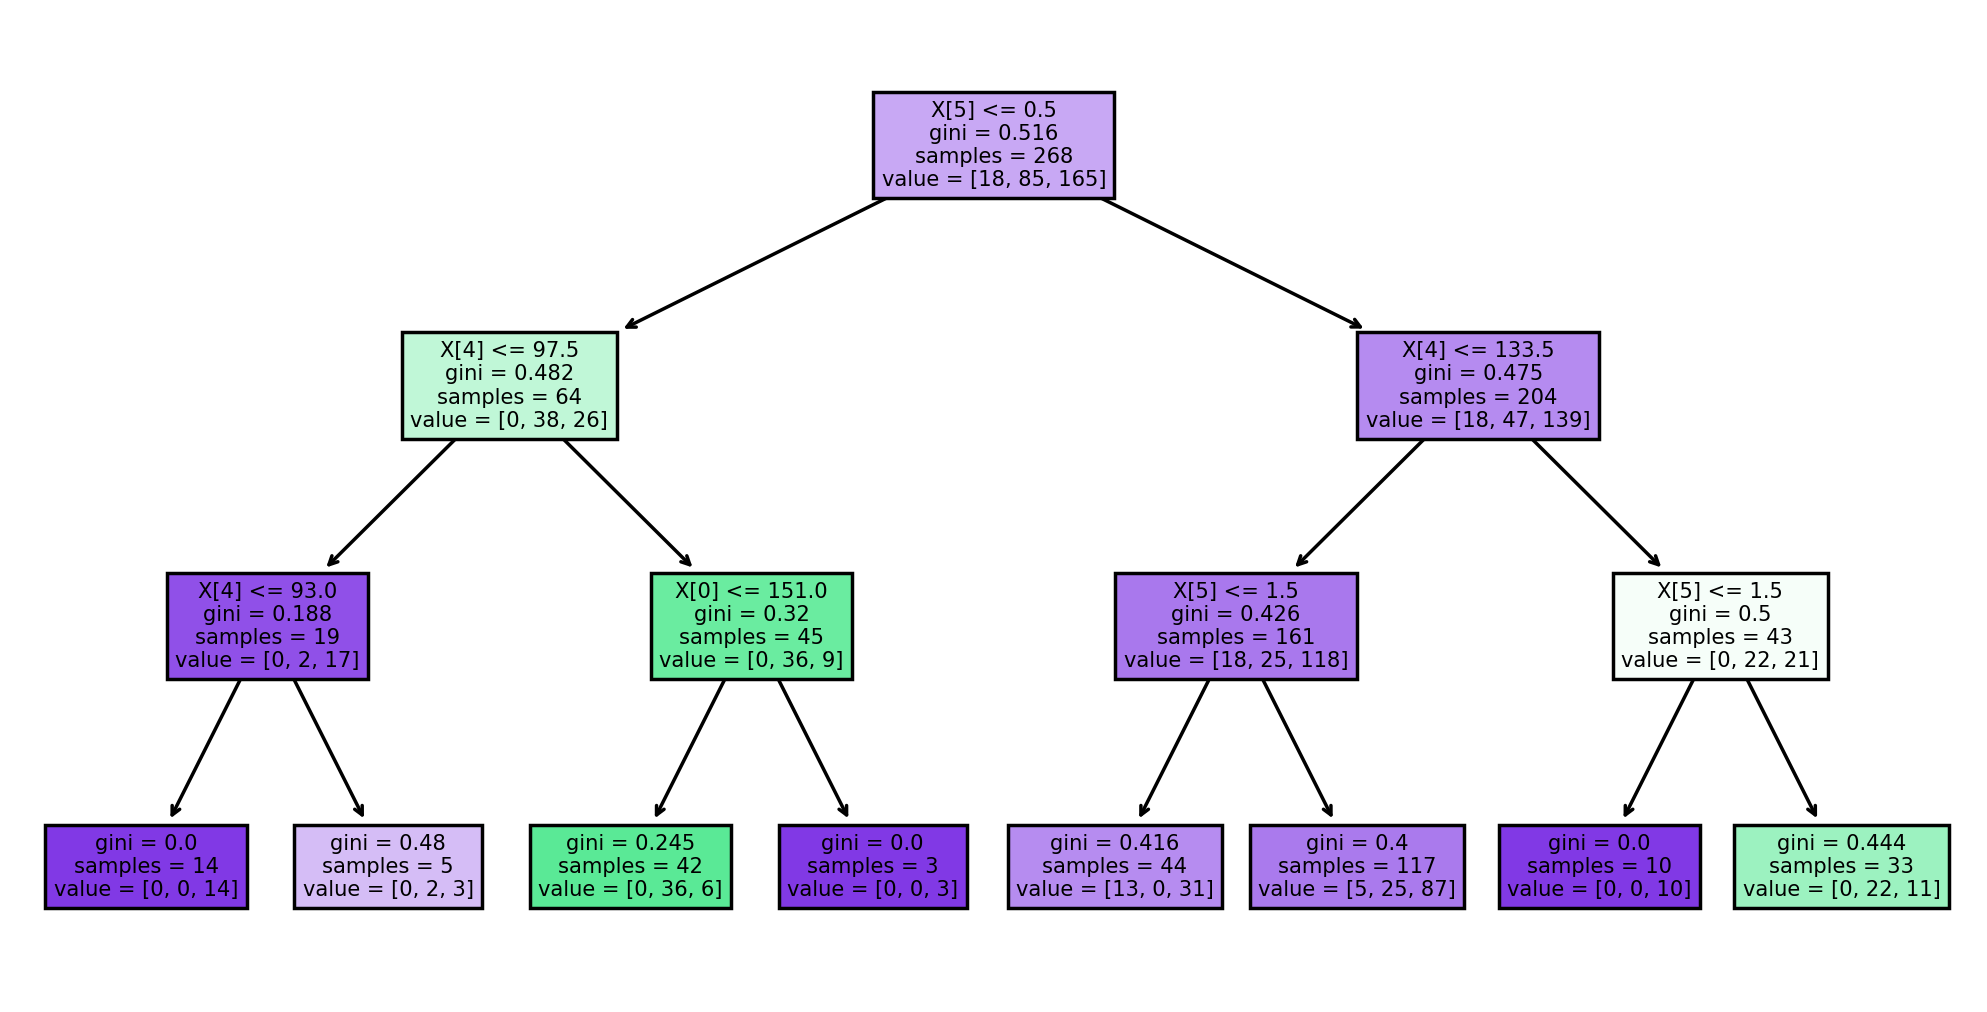

In [23]:
tree.plot_tree(dt,filled=True,max_depth=3)

In [24]:
cn=['Low', 'Medium', 'High']

[Text(0.5, 0.875, 'ShelveLoc <= 0.5\ngini = 0.516\nsamples = 268\nvalue = [18, 85, 165]\nclass = High'),
 Text(0.25, 0.625, 'Price <= 97.5\ngini = 0.482\nsamples = 64\nvalue = [0, 38, 26]\nclass = Medium'),
 Text(0.125, 0.375, 'Price <= 93.0\ngini = 0.188\nsamples = 19\nvalue = [0, 2, 17]\nclass = High'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 0, 14]\nclass = High'),
 Text(0.1875, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = High'),
 Text(0.375, 0.375, 'CompPrice <= 151.0\ngini = 0.32\nsamples = 45\nvalue = [0, 36, 9]\nclass = Medium'),
 Text(0.3125, 0.125, 'gini = 0.245\nsamples = 42\nvalue = [0, 36, 6]\nclass = Medium'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = High'),
 Text(0.75, 0.625, 'Price <= 133.5\ngini = 0.475\nsamples = 204\nvalue = [18, 47, 139]\nclass = High'),
 Text(0.625, 0.375, 'ShelveLoc <= 1.5\ngini = 0.426\nsamples = 161\nvalue = [18, 25, 118]\nclass = High'),
 Text(0.5625, 0.125, 'gini = 0.416\nsam

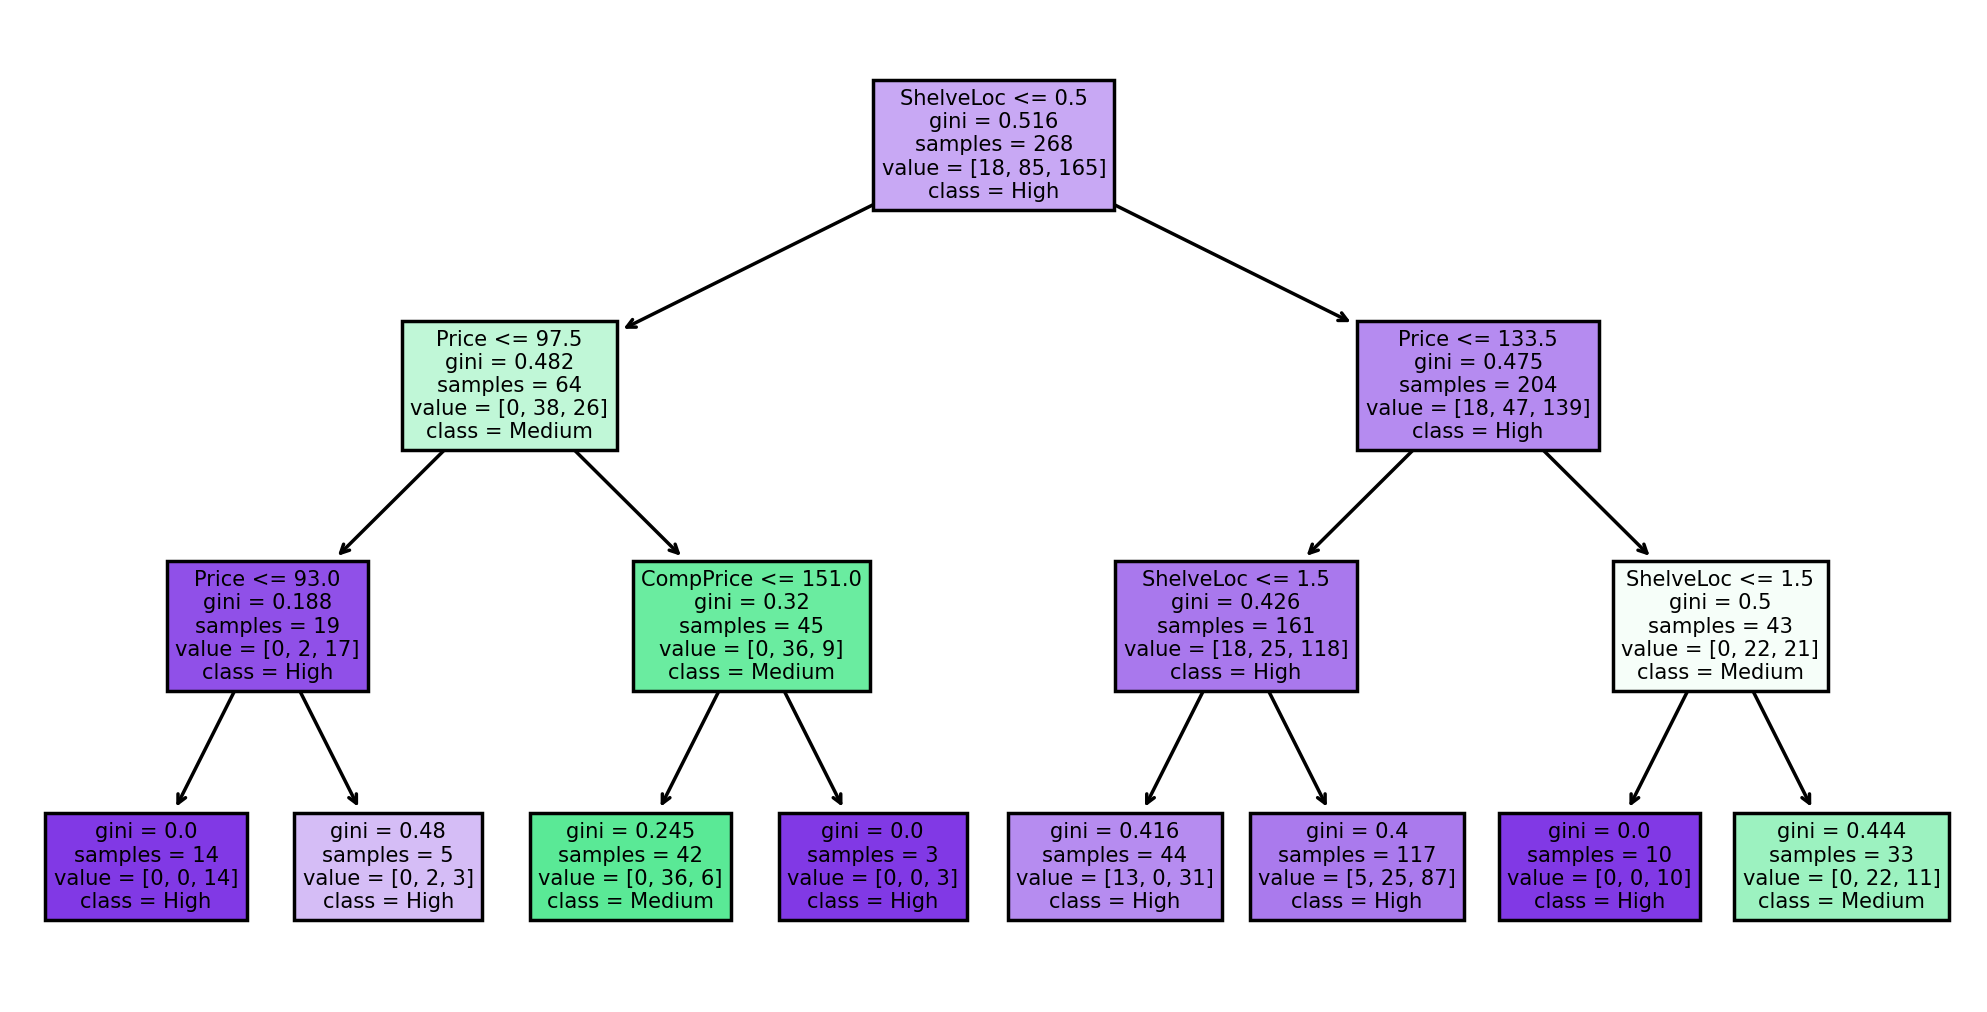

In [25]:
tree.plot_tree(dt, feature_names=x.columns, class_names=cn, filled=True)